In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os, sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from deepomics import neuralnetwork as nn
from deepomics import utils, fit, visualize, saliency, metrics

import helper

np.random.seed(247)
tf.set_random_seed(247)

In [3]:
data_path = '../data/Synthetic_dataset.h5'
results_path = '../results'
params_path = utils.make_directory(results_path, 'model_params')

# load dataset
train, valid, test = helper.load_synthetic_dataset(data_path)

test_model = helper.load_synthetic_models(data_path, dataset='test')
    
# get data shapes
input_shape = list(train['inputs'].shape)
input_shape[0] = None
output_shape = [None, train['targets'].shape[1]]

loading training data
loading cross-validation data
loading test data


# LocalNet

In [1]:
tf.reset_default_graph()

model_name = 'LocalNet'
dropout_status = True
l2_status = True
bn_status = True
    
# load model parameters
model_layers, optimization, genome_model = helper.load_model(model_name, 
                                                             input_shape, 
                                                             dropout_status, 
                                                             l2_status, 
                                                             bn_status)
# build neural network class
nnmodel = nn.NeuralNet(seed=247)
nnmodel.build_layers(model_layers, optimization, supervised=True)
nnmodel.inspect_layers()

NameError: name 'tf' is not defined

In [4]:
# compile neural trainers
model_path = utils.make_directory(params_path, model_name)
file_path = os.path.join(model_path, model_name+'_do_l2_bn')
nntrainer = nn.NeuralTrainer(nnmodel, save='best', file_path=file_path)

# initialize session
sess = utils.initialize_session()

# load best parameters
nntrainer.set_best_parameters(sess)

activations = nntrainer.get_activations(sess, test, layer='conv1d_1_active')
activations = np.squeeze(activations)


loading model from:  ../results/regulatory_code/model_params/ShallowNet/ShallowNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/regulatory_code/model_params/ShallowNet/ShallowNet_do_l2_bn_best.ckpt


In [ ]:
index = 7

X = np.expand_dims(test['inputs'][index], axis=0)
X_model = test_model[index]


In [10]:
active_indices = [5, 44, 55, 66]
num_plots = len(active_indices)

plot_index = []
for index in active_indices:
    indices = np.argsort(activations[:,index])[::-1]
    plot_index.append(indices[:5])
plot_index

In [20]:
plot_index = [563, 1561, 3398, 2750, 1184]

X_model = test_model[plot_index]
X = test['inputs'][plot_index]


# saliency parameters
params = {'model_name': model_name, 
          'input_shape': input_shape, 
          'dropout_status': dropout_status,
          'l2_status': l2_status,
          'bn_status': bn_status,
          'model_path': file_path+'_best.ckpt',
         }


saliency = []
for neuron_index in active_indices:
    val = helper.backprop(X, layer='conv1d_1_active', class_index=neuron_index, params=params, method='guided')
    saliency.append(val)


INFO:tensorflow:Restoring parameters from ../results/regulatory_code/model_params/ShallowNet/ShallowNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/regulatory_code/model_params/ShallowNet/ShallowNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/regulatory_code/model_params/ShallowNet/ShallowNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/regulatory_code/model_params/ShallowNet/ShallowNet_do_l2_bn_best.ckpt


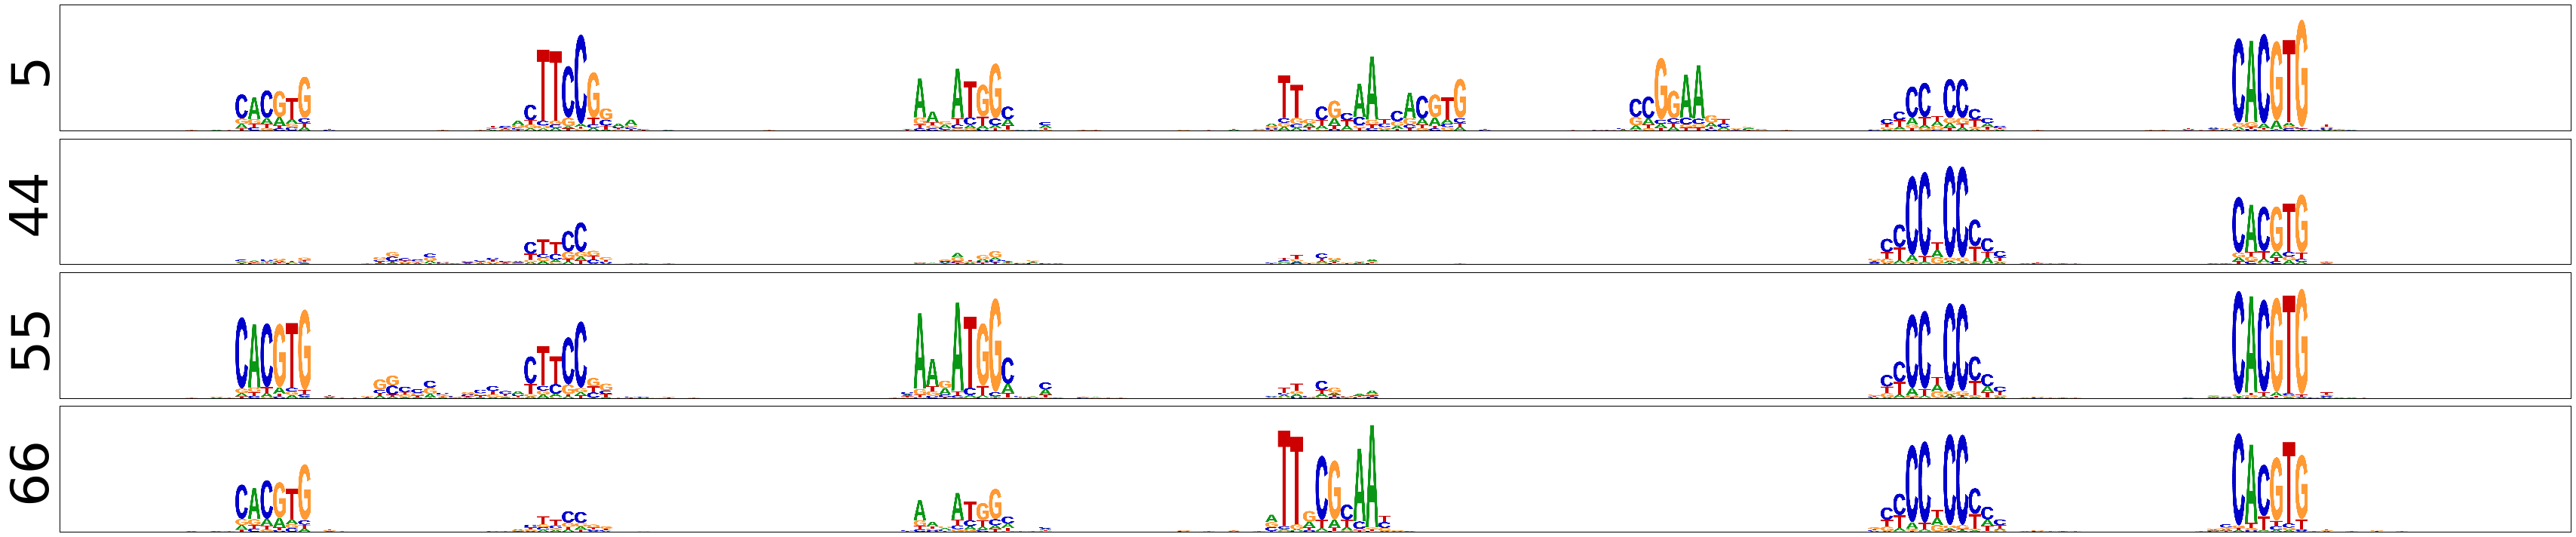

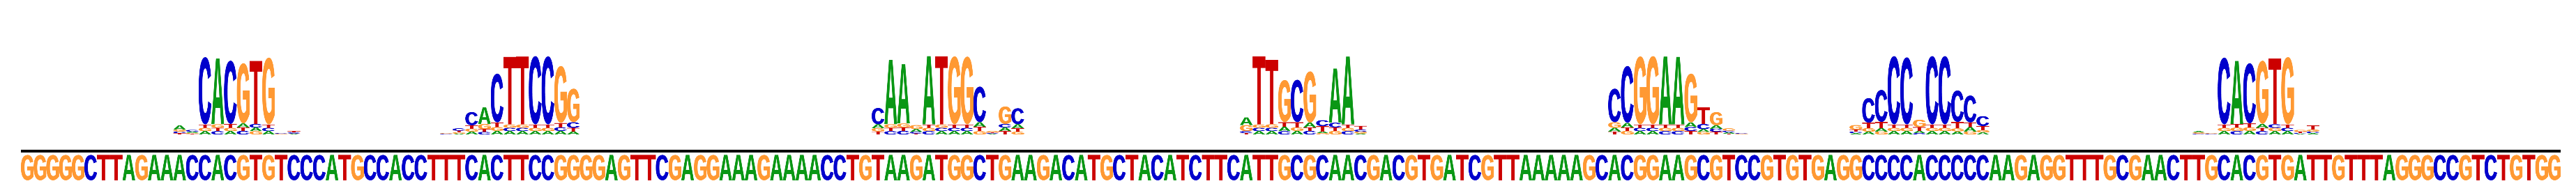

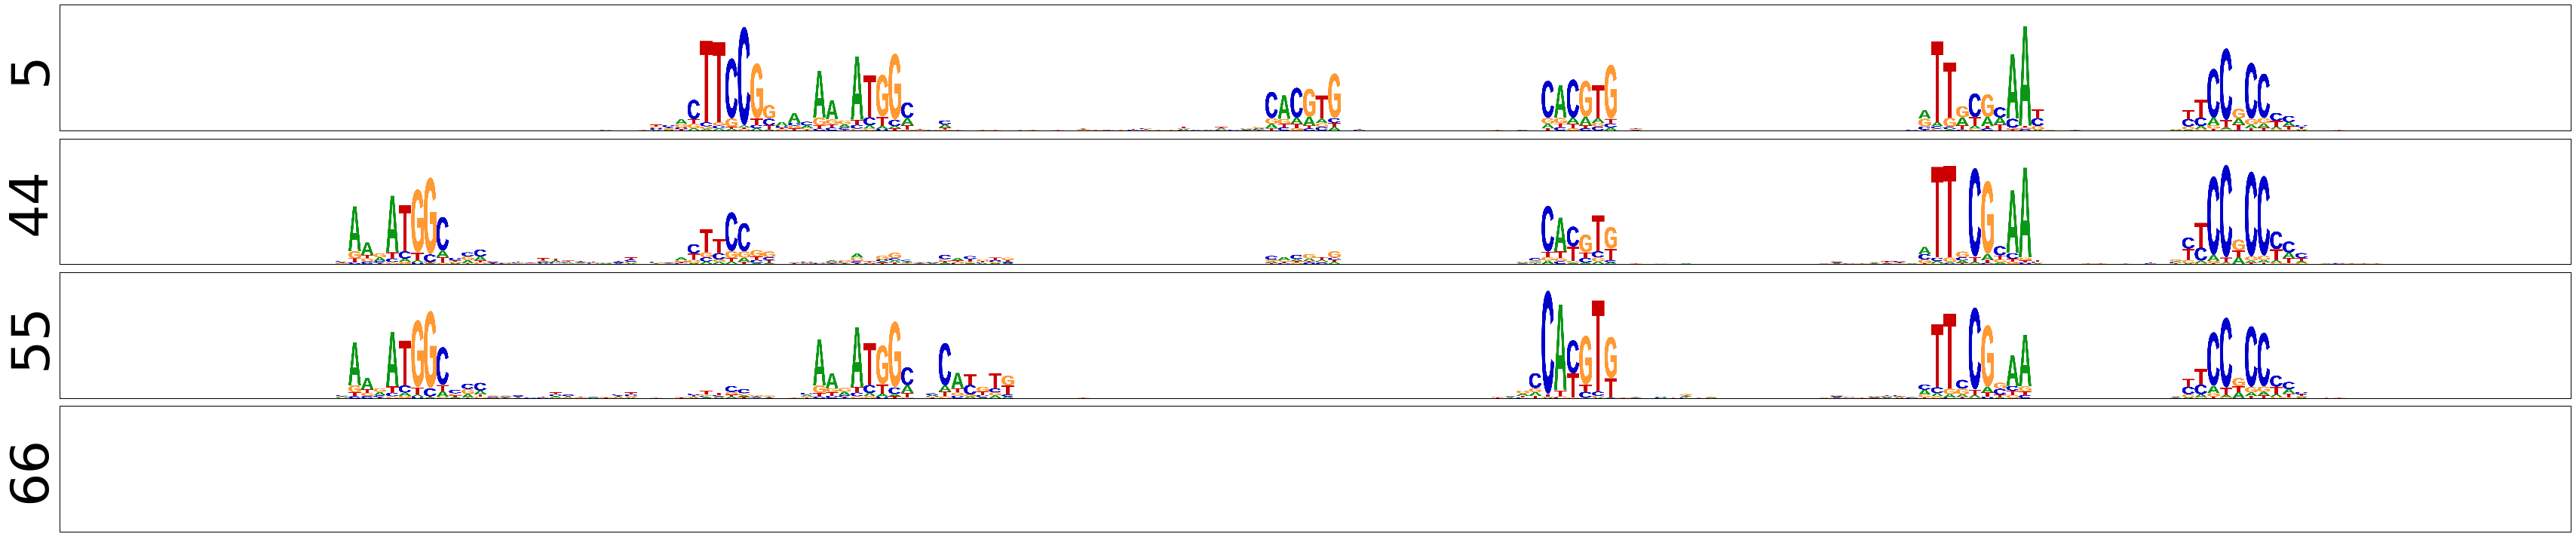

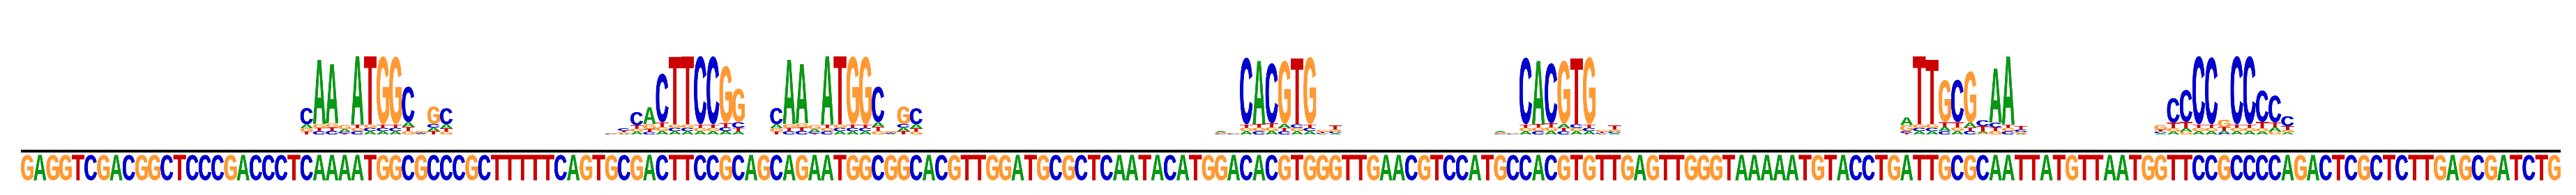

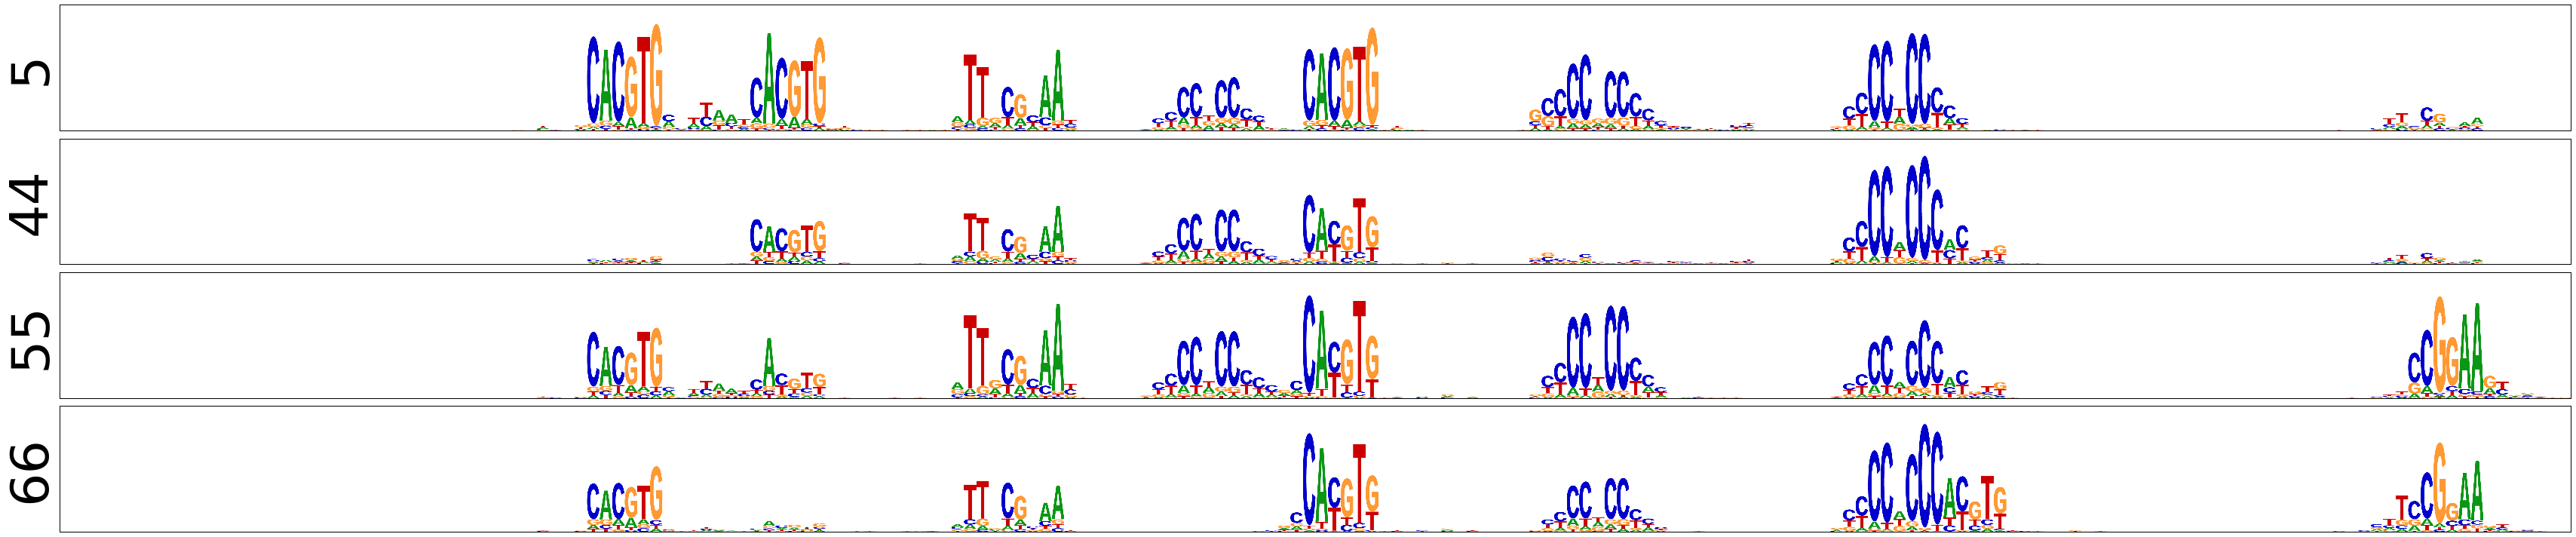

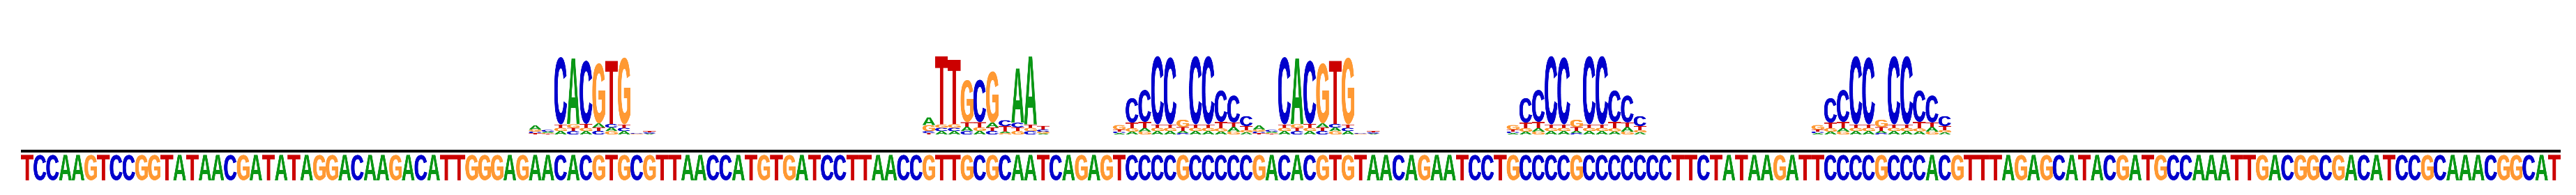

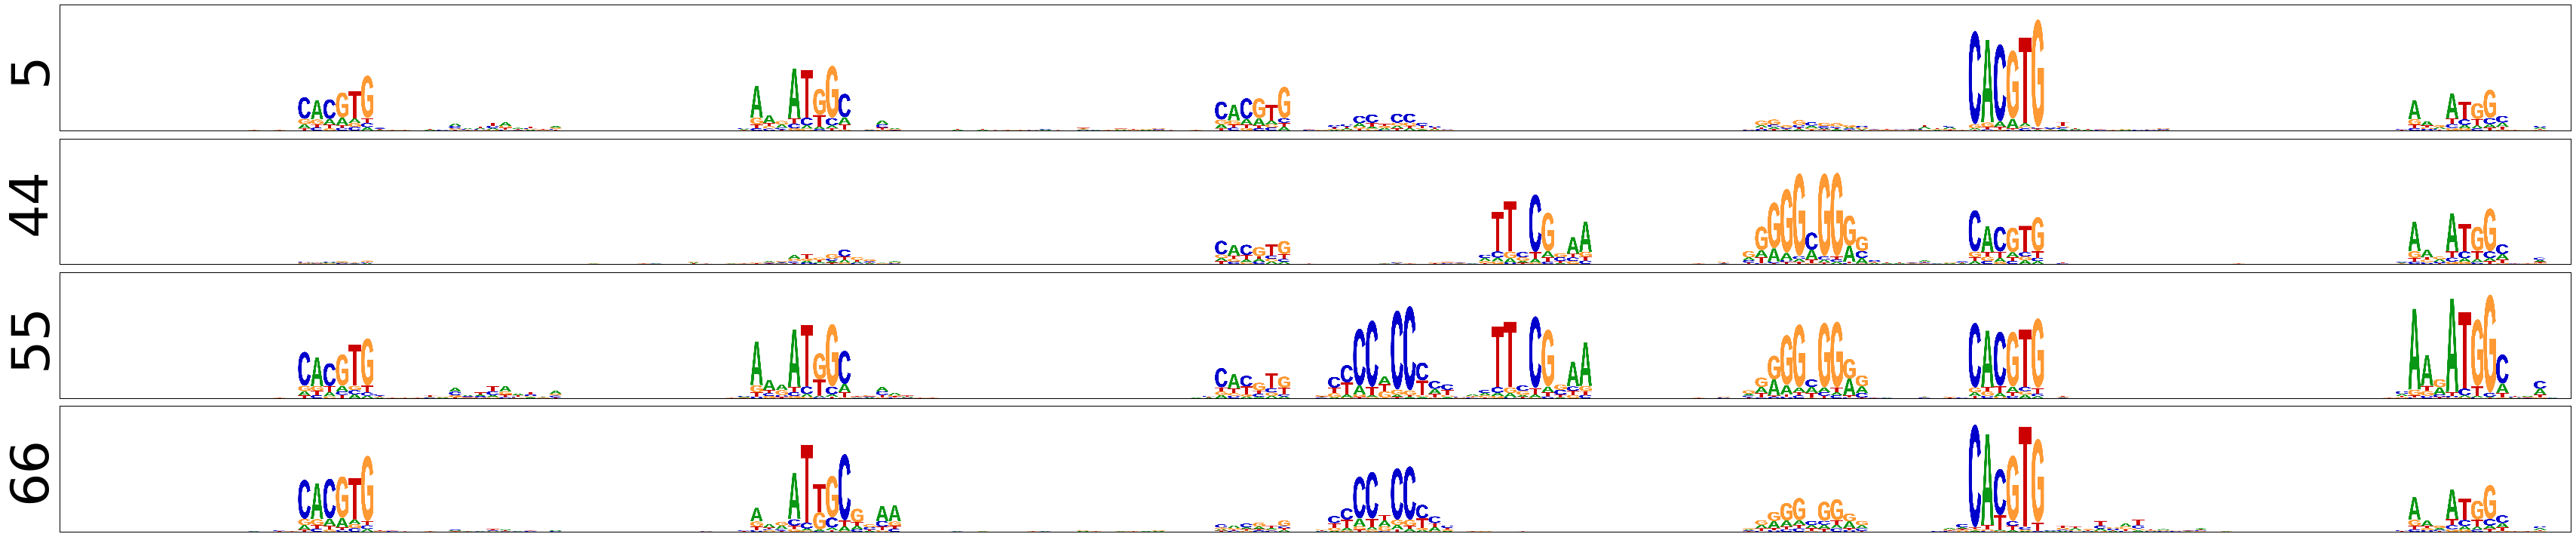

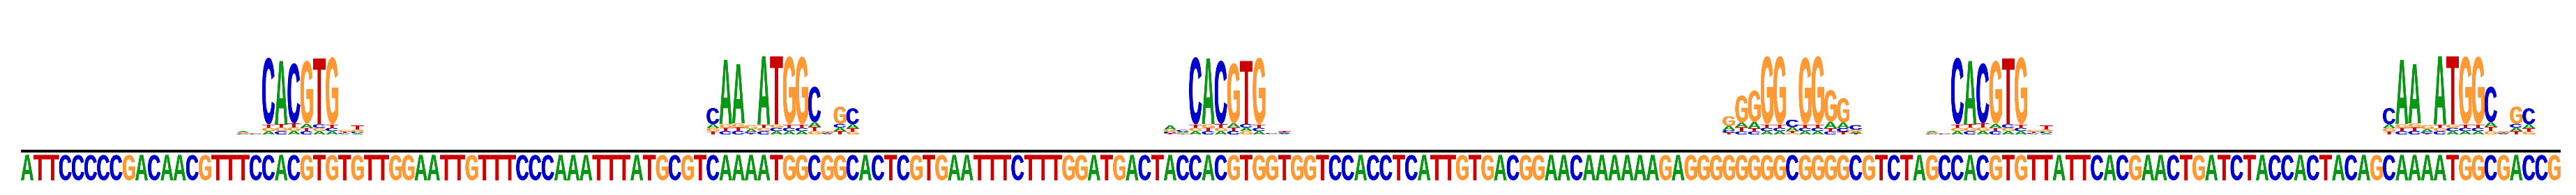

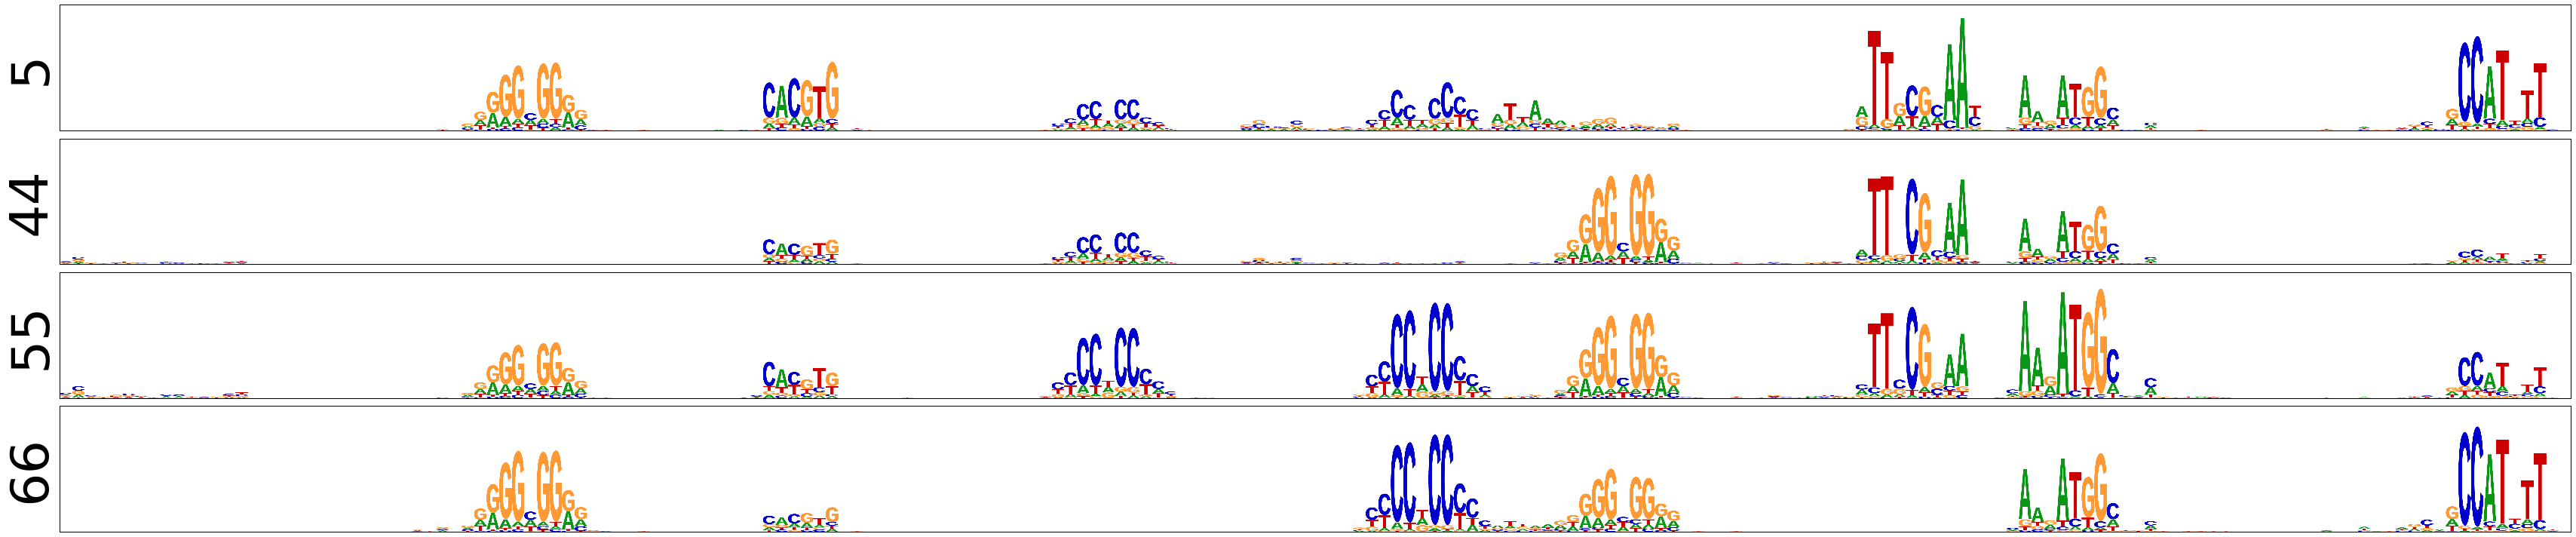

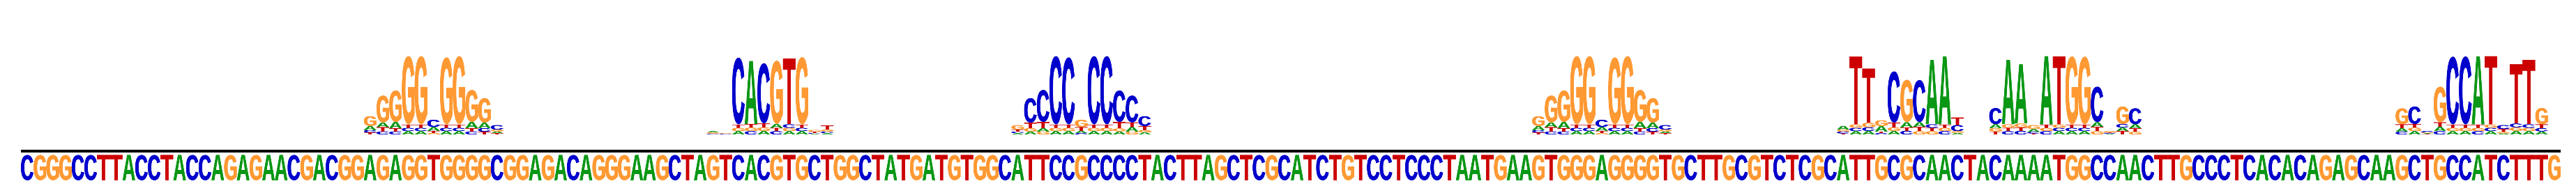

In [30]:

save_path = utils.make_directory(results_path, 'expressivity')
num_plots = 4

for j in range(5):

    fig = plt.figure(figsize=(100,10))
    for i in range(4):
        plt.subplot(num_plots,1,i+1)
        pwm = utils.normalize_pwm(np.squeeze(saliency[i][j]).T, factor=3)
        logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
        plt.imshow(logo)
        plt.xticks([])
        plt.yticks([])
        plt.ylabel(str(active_indices[i]), fontsize=70)


    outfile = os.path.join(save_path,model_name+'_'+str(j)+'_layer1.pdf')
    fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


    fig = plt.figure(figsize=(100,4))
    visualize.plot_seq_pos_saliency(np.squeeze(X[j]).T, X_model[j], alphabet='dna', nt_width=50, norm_factor=3)
    outfile = os.path.join(save_path,model_name+'_'+str(j)+'_model.pdf')
    fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')



# DistNet

In [4]:
tf.reset_default_graph()

model_name = 'DistNet'
dropout_status = True
l2_status = True
bn_status = True
    
# load model parameters
model_layers, optimization, genome_model = helper.load_model(model_name, 
                                                             input_shape, 
                                                             dropout_status, 
                                                             l2_status, 
                                                             bn_status)
# build neural network class
nnmodel = nn.NeuralNet(seed=247)
nnmodel.build_layers(model_layers, optimization, supervised=True)
nnmodel.inspect_layers()

----------------------------------------------------------------------------
Network architecture:
----------------------------------------------------------------------------
layer1: inputs
(?, 200, 1, 4)
layer2: conv1d_0
(?, 200, 1, 24)
layer3: conv1d_0_batch
(?, 200, 1, 24)
layer4: conv1d_0_active
(?, 200, 1, 24)
layer5: conv1d_0_dropout
(?, 200, 1, 24)
layer6: conv1d_1
(?, 195, 1, 32)
layer7: conv1d_1_batch
(?, 195, 1, 32)
layer8: conv1d_1_active
(?, 195, 1, 32)
layer9: conv1d_1_maxpool
(?, 65, 1, 32)
layer10: conv1d_1_dropout
(?, 65, 1, 32)
layer11: conv1d_2
(?, 60, 1, 48)
layer12: conv1d_2_batch
(?, 60, 1, 48)
layer13: conv1d_2_active
(?, 60, 1, 48)
layer14: conv1d_2_maxpool
(?, 15, 1, 48)
layer15: conv1d_2_dropout
(?, 15, 1, 48)
layer16: conv1d_3
(?, 12, 1, 68)
layer17: conv1d_3_batch
(?, 12, 1, 68)
layer18: conv1d_3_active
(?, 12, 1, 68)
layer19: conv1d_3_maxpool
(?, 4, 1, 68)
layer20: conv1d_3_dropout
(?, 4, 1, 68)
layer21: conv1d_4
(?, 1, 1, 96)
layer22: conv1d_4_batch
(?, 1,

In [5]:
# compile neural trainers
model_path = utils.make_directory(params_path, model_name)
file_path = os.path.join(model_path, model_name+'_do_l2_bn')
nntrainer = nn.NeuralTrainer(nnmodel, save='best', file_path=file_path)

# initialize session
sess = utils.initialize_session()

# load best parameters
nntrainer.set_best_parameters(sess)

activations = nntrainer.get_activations(sess, test, layer='conv1d_3_active')
activations = np.squeeze(activations)


loading model from:  ../results/regulatory_code/model_params/DeepNet/DeepNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/regulatory_code/model_params/DeepNet/DeepNet_do_l2_bn_best.ckpt


In [9]:
plot_index = [563, 1561, 3398, 2750, 1184]
active_indices = [9, 23, 60, 85]

X_model = test_model[plot_index]
X = test['inputs'][plot_index]


# saliency parameters
params = {'model_name': model_name, 
          'input_shape': input_shape, 
          'output_shape': output_shape, 
          'dropout_status': dropout_status,
          'l2_status': l2_status,
          'bn_status': bn_status,
          'model_path': file_path+'_best.ckpt',
         }

saliency = []
for neuron_index in active_indices:
    val = helper.backprop(X, layer='conv1d_4_active', class_index=neuron_index, params=params, method='guided')
    saliency.append(val)


INFO:tensorflow:Restoring parameters from ../results/regulatory_code/model_params/DeepNet/DeepNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/regulatory_code/model_params/DeepNet/DeepNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/regulatory_code/model_params/DeepNet/DeepNet_do_l2_bn_best.ckpt
INFO:tensorflow:Restoring parameters from ../results/regulatory_code/model_params/DeepNet/DeepNet_do_l2_bn_best.ckpt


/usr/lib/python2.7/dist-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


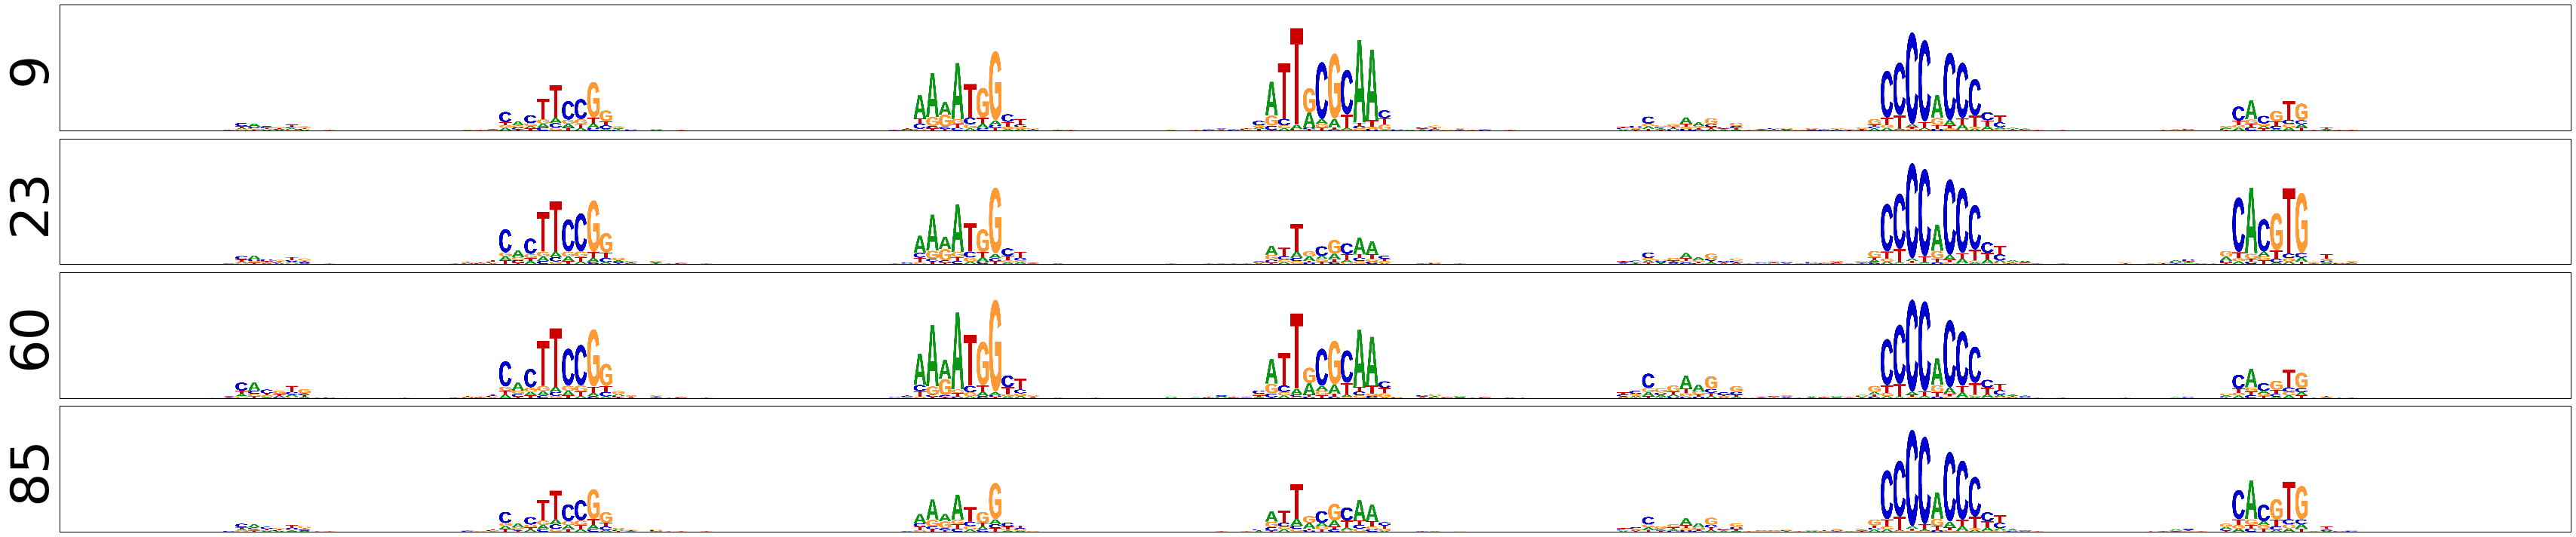

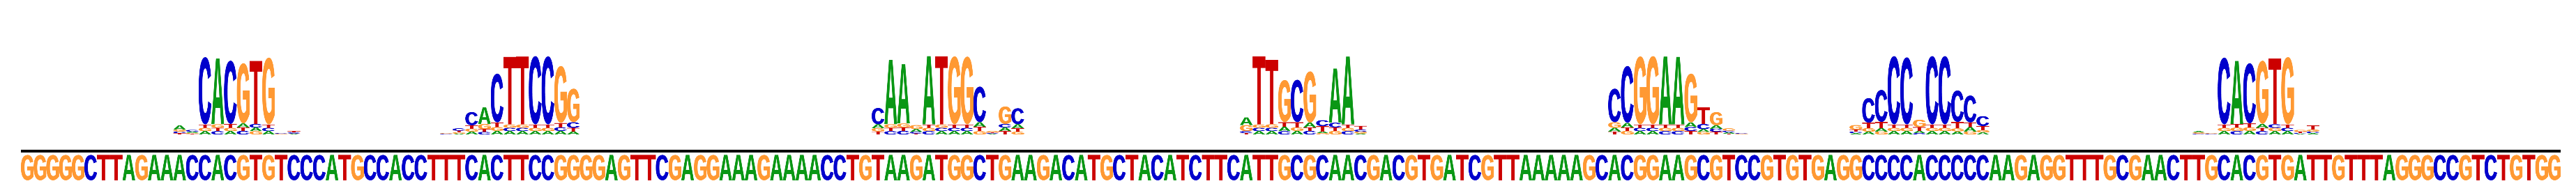

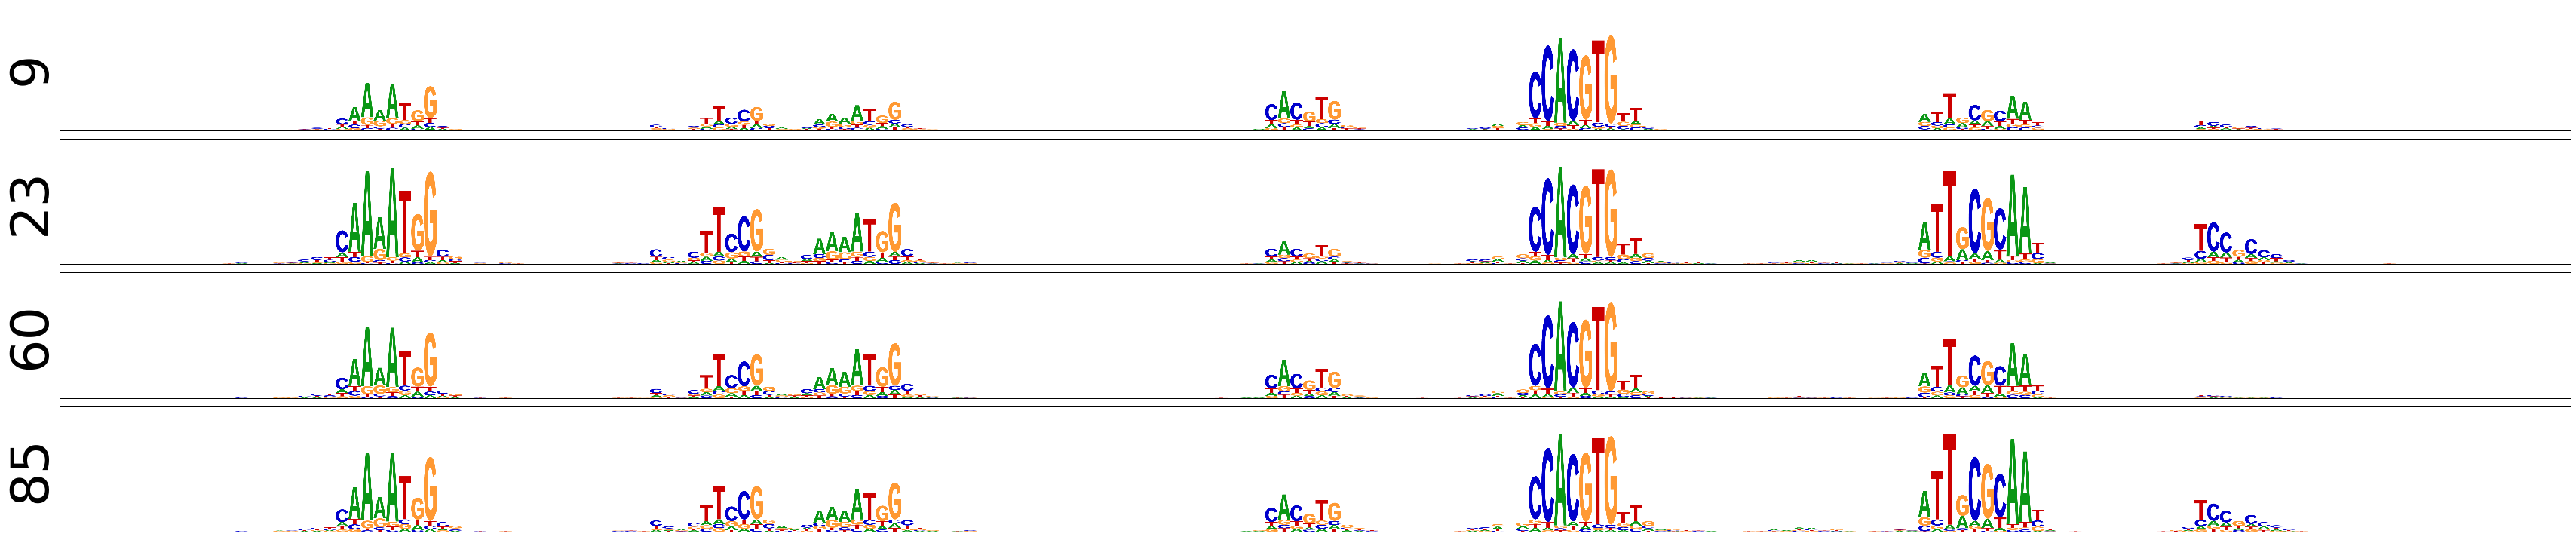

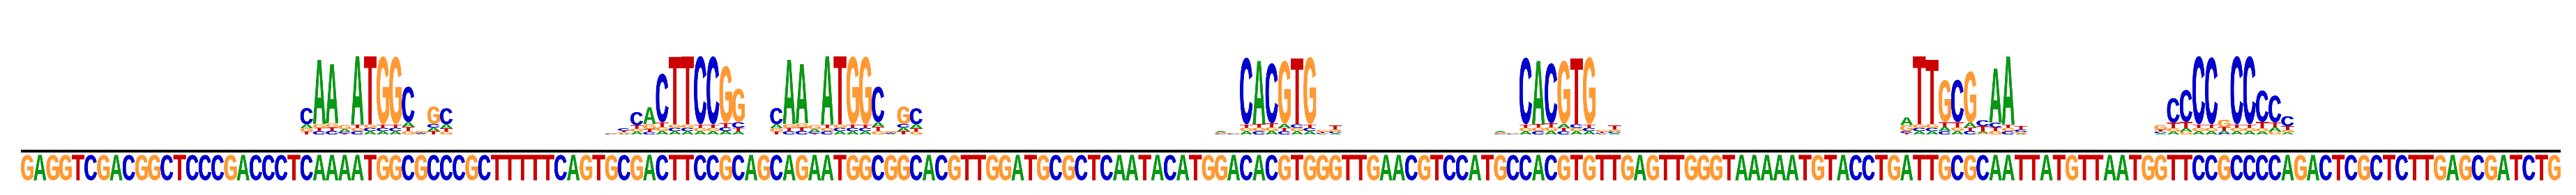

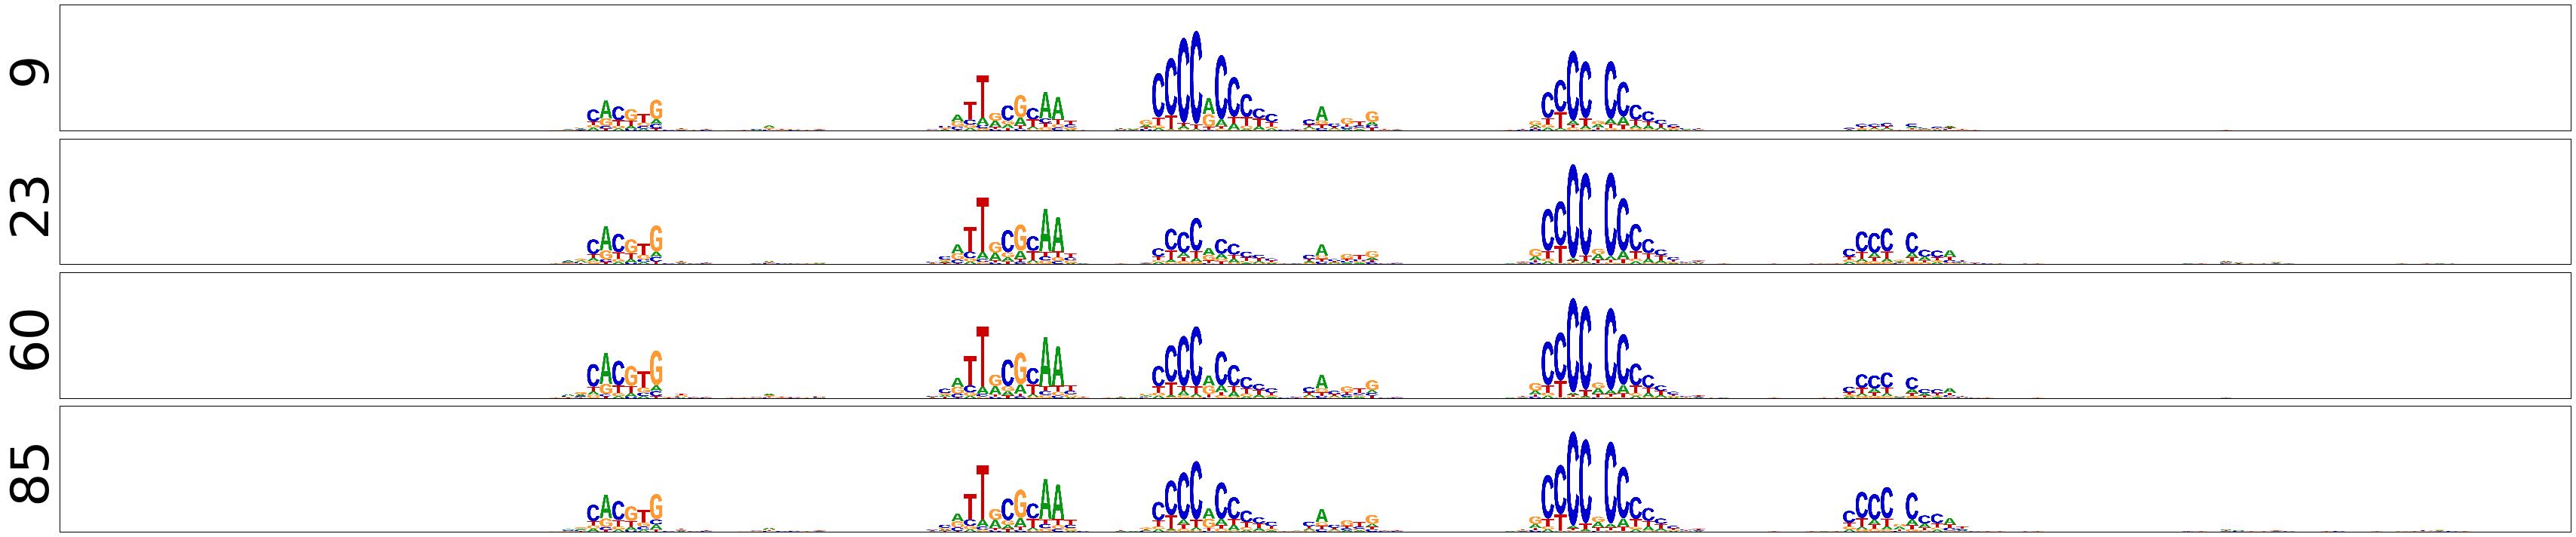

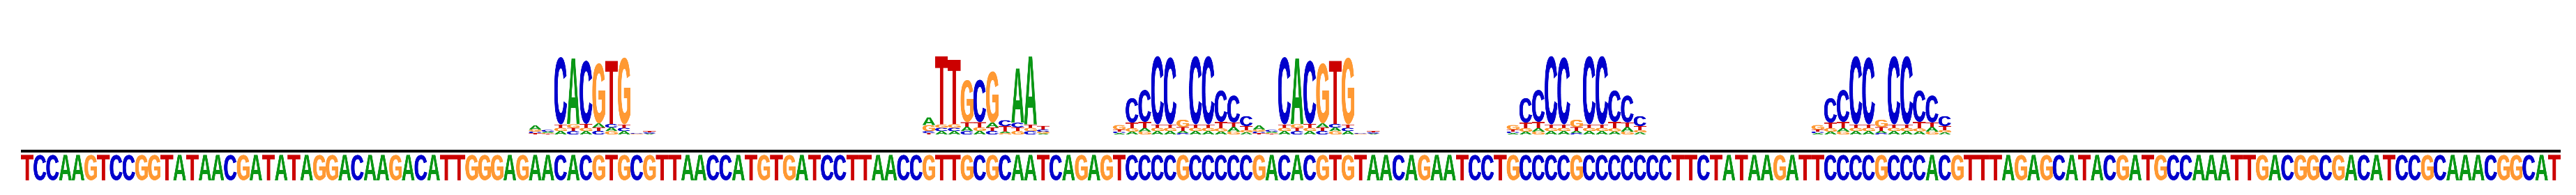

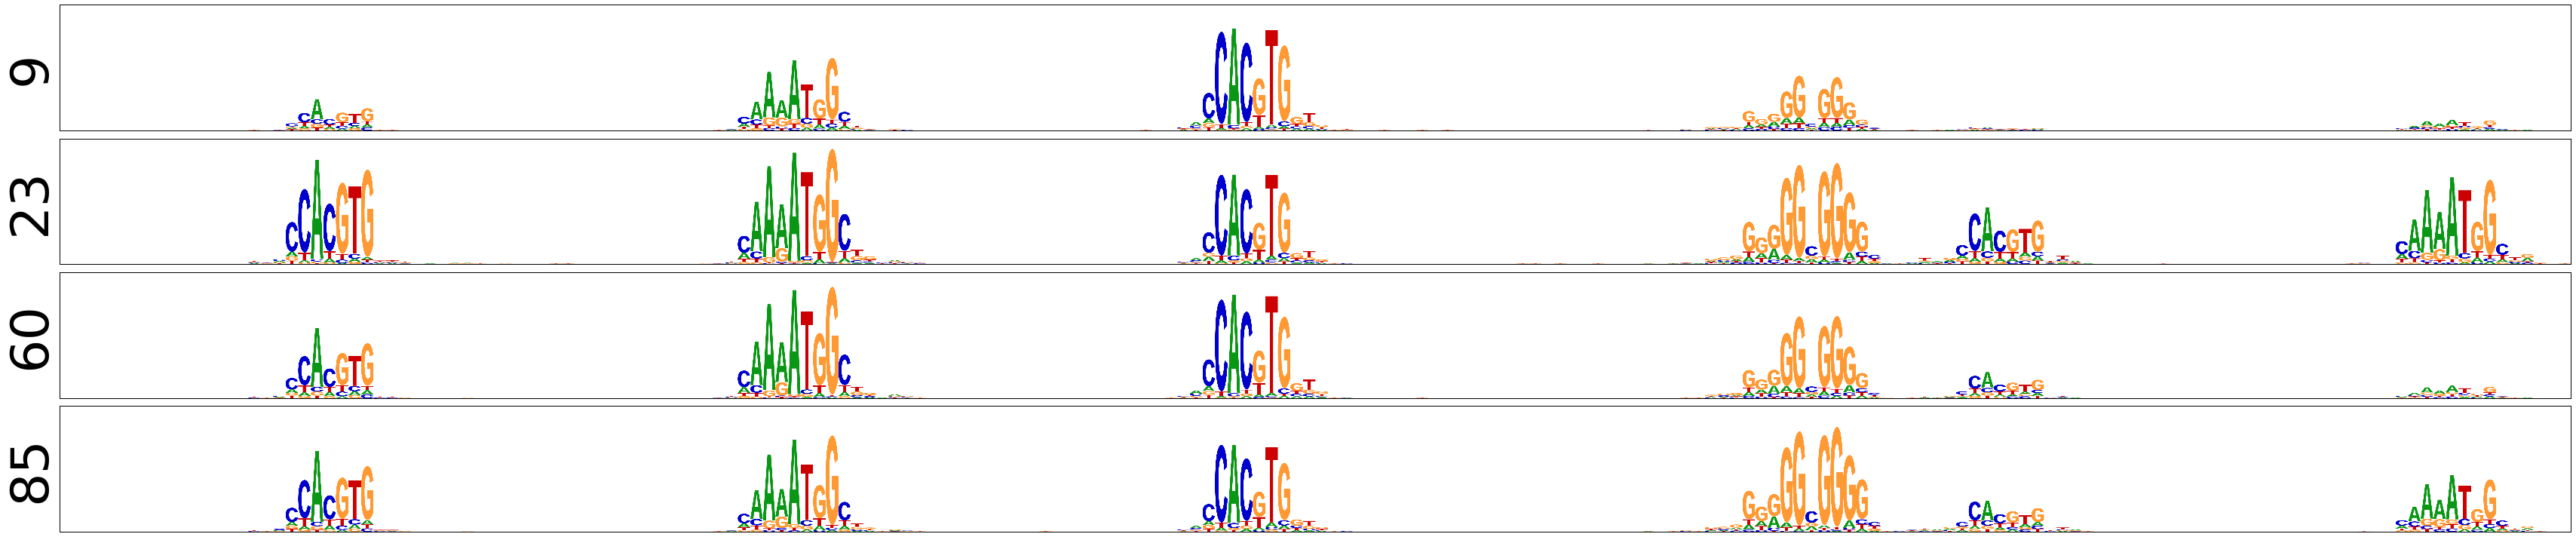

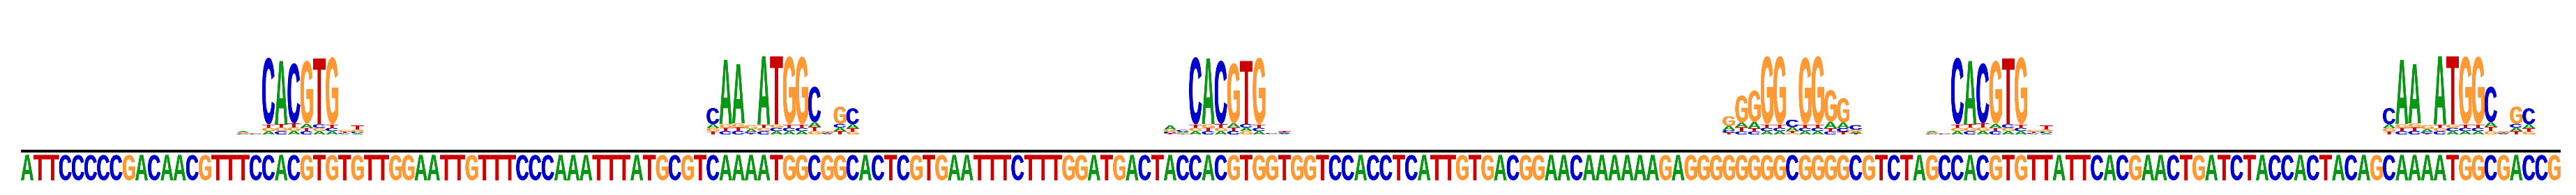

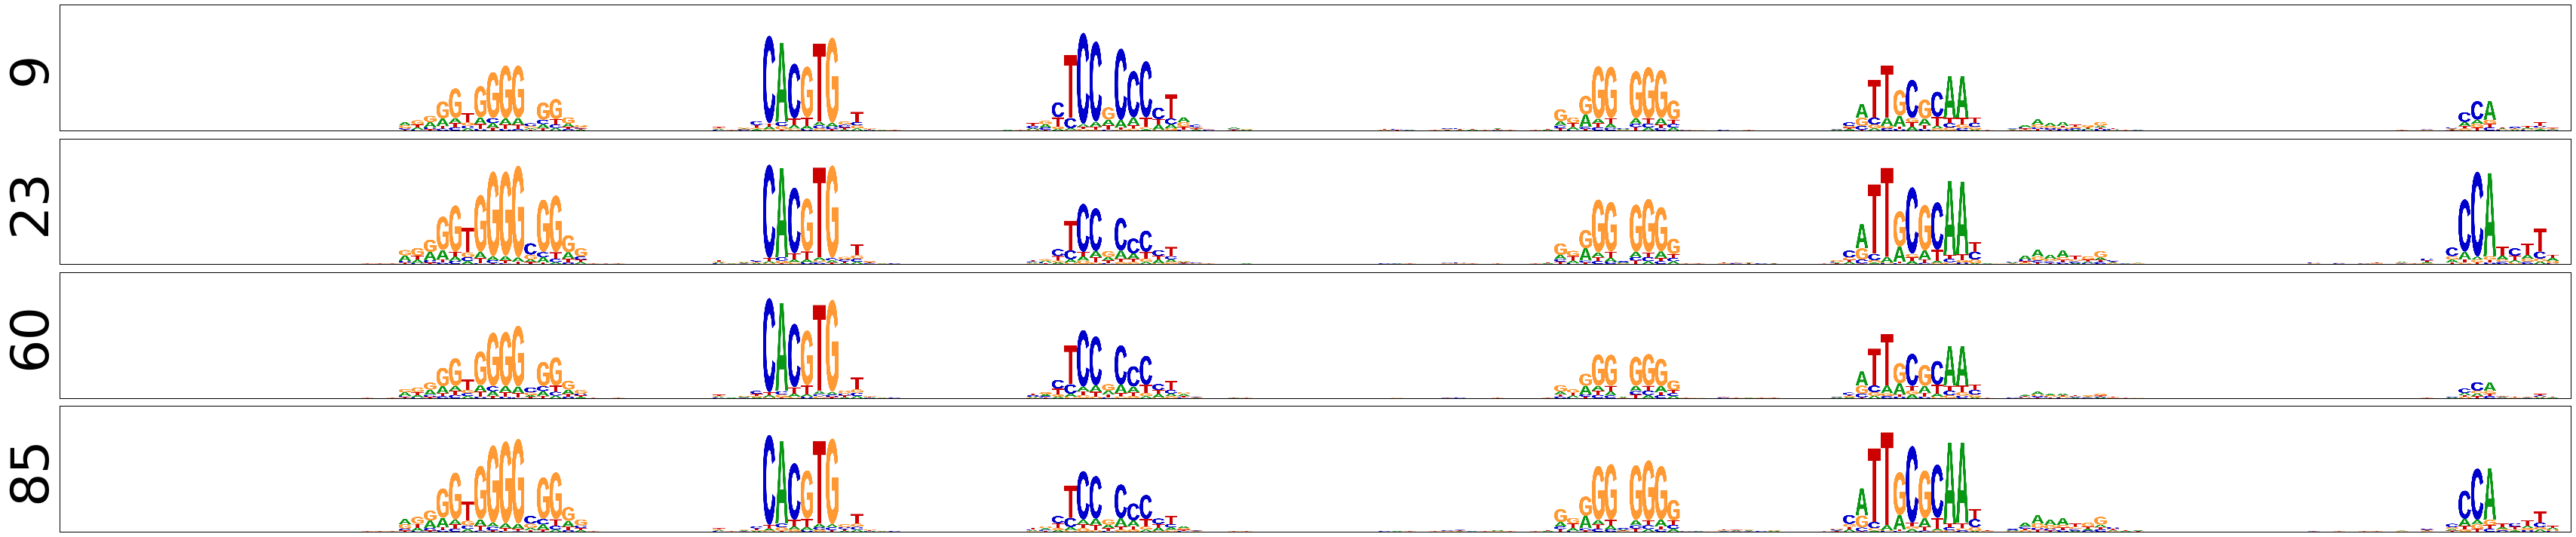

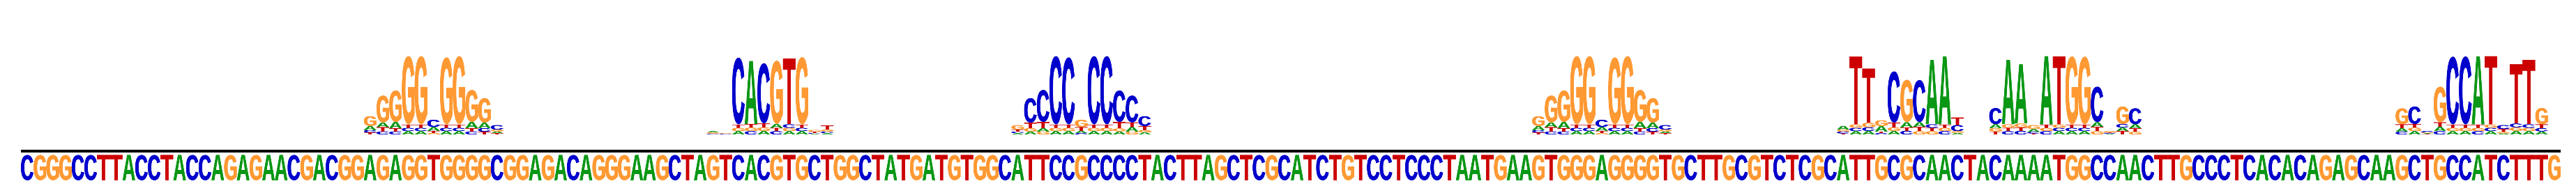

In [10]:

save_path = utils.make_directory(results_path, 'expressivity')
num_plots = 4

for j in range(5):

    fig = plt.figure(figsize=(100,10))
    for i in range(4):
        plt.subplot(num_plots,1,i+1)
        pwm = utils.normalize_pwm(np.squeeze(saliency[i][j]).T, factor=3)
        logo = visualize.seq_logo(pwm, height=500, nt_width=100, norm=0, alphabet='dna')
        plt.imshow(logo)
        plt.xticks([])
        plt.yticks([])
        plt.ylabel(str(active_indices[i]), fontsize=70)


    outfile = os.path.join(save_path,model_name+'_'+str(j)+'_layer.pdf')
    fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


    fig = plt.figure(figsize=(100,4))
    visualize.plot_seq_pos_saliency(np.squeeze(X[j]).T, X_model[j], alphabet='dna', nt_width=50, norm_factor=3)
    outfile = os.path.join(save_path,model_name+'_'+str(j)+'_model.pdf')
    fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

